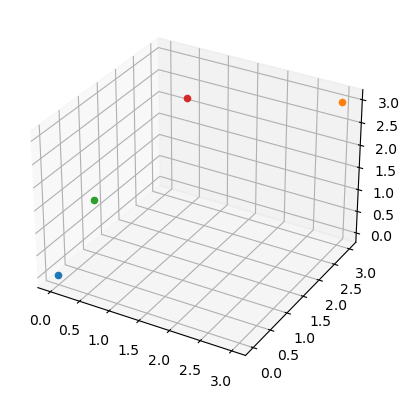

Расстояние Евклида между x и y: 5.196152422706632
Расстояние Евклида между x и z: 1.4142135623730951
Расстояние Евклида между x и w: 3.7416573867739413
Расстояние Евклида между y и z: 4.123105625617661
Расстояние Евклида между y и w: 2.23606797749979
Расстояние Евклида между z и w: 2.449489742783178
Квадрат Евклидова расстояния между y и z: 17.0
Расстояние Чебышева между z и w: 2.0
Расстояние Хемминга между w и x: 6.0


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = np.array([0,0,0])
y = np.array([3,3,3])
z = np.array([0,1,1])
w = np.array([1,2,3])

ax.scatter(*x)
ax.scatter(3, 3, 3)
ax.scatter(0, 1, 1)
ax.scatter(1, 2, 3)
plt.show()

print('Расстояние Евклида между x и y:', np.linalg.norm(x-y))
print('Расстояние Евклида между x и z:', np.linalg.norm(x-z))
print('Расстояние Евклида между x и w:', np.linalg.norm(x-w))
print('Расстояние Евклида между y и z:', np.linalg.norm(y-z))
print('Расстояние Евклида между y и w:', np.linalg.norm(y-w))
print('Расстояние Евклида между z и w:', np.linalg.norm(z-w))
print('Квадрат Евклидова расстояния между y и z:', np.linalg.norm(y-z) ** 2)
print('Расстояние Чебышева между z и w:', np.linalg.norm(z-w, ord=np.inf))
print('Расстояние Хемминга между w и x:', np.linalg.norm(w-x,ord=1))

In [3]:
Z = np.zeros((5,5))
Z += np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


Чему равно k?10
KNeighborsClassifier(n_neighbors=10)
accuracy: 0.913


C:\Users\marat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


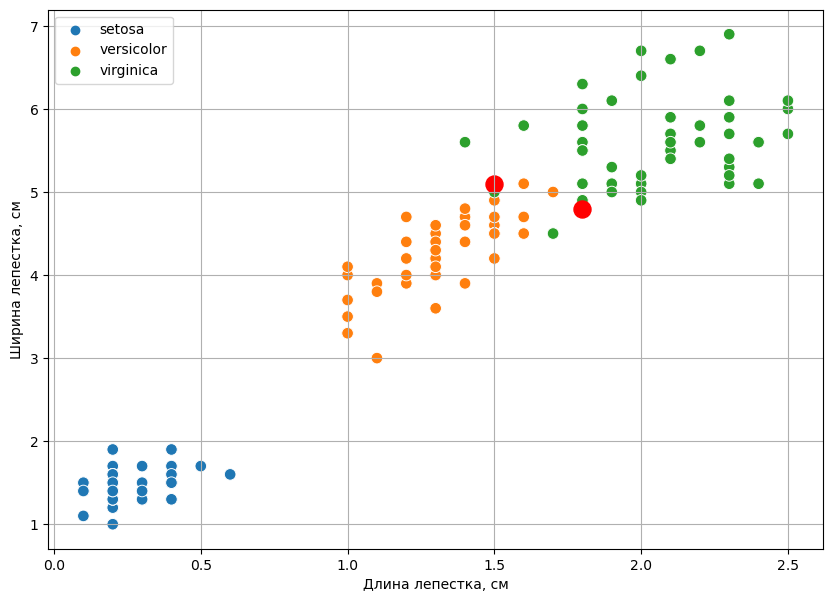

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


iris = sns.load_dataset('iris')
iris


def init_model(k, X_train, y_train, X_test): # Установите другое количество ближайших соседей (k = 1, 5, 10).
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    print(model)
    y_pred = model.predict(X_test)
    return y_pred

def graph(y_test, X_test, y_pred): #  Постройте графики
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
    plt.xlabel("Длина лепестка, см")
    plt.ylabel("Ширина лепестка, см")
    plt.legend(loc=2)
    plt.grid()

    for i in range(len(y_test)):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15 # Установите размер тестовой выборки 15% от всего датасета.
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.head()
y_train.head()

k = int(input('Чему равно k?'))

y_pred = init_model(k, X_train, y_train, X_test)
print((f'accuracy: {accuracy_score(y_pred, y_test) :.3}'))
graph(y_test, X_test, y_pred)

In [11]:
from sklearn.feature_extraction import DictVectorizer
eye_color = [
    {'зеленые': 1, 'синие': 0, 'карие': 0},
    {'зеленые': 0, 'синие': 0, 'карие': 1},
    {'зеленые': 1, 'синие': 0, 'карие': 0},
    {'зеленые': 1, 'синие': 0, 'карие': 0},
    {'зеленые': 0, 'синие': 0, 'карие': 1},
]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(eye_color)
features

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])